# MOVIE RECOMMENDATION SYSTEM

## COLLABORATIVE FILTERING


### INTRODUCTION
•	Collaborative filtering filters information by using the interactions and data collected by the system from other users. It is based on the idea that individuals who have agreed on certain items in their assessment are likely to agree again in the future.

•	The idea is simple: we always ask our friends for suggestions when we want to find a new movie to watch. Of course, we have more faith in the advice of friends who share tastes like ours.

•	The so-called similarity index-based approach is applied by most collaborative filtering systems. In the neighborhood-based method, based on their similarities to the active user, multiple users are chosen. Active user inference is made by measuring the weighted average of the selected user ratings.

•	The relationship between users and objects is the subject of collaborative-filtering systems. The similarity of the items is determined by the similarity between the users who have rated all items and the ratings of those items.



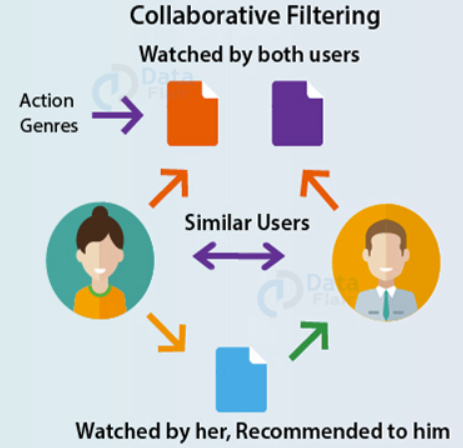

There are two classes of Collaborative Filtering:

• **User-based**, which measures the similarity between target users and other users.

•	**Item-based**, which measures the similarity between the items that target users’ rate or interact with and other items.




### Types of collaborative filtering –
The CF techniques are broadly divided into 2-types:

•	Memory Based approach.

•	Model Based approach.


## **Model Based Approach-**

In this method, CF models are built to predict the user's rating of unrated objects using machine learning algorithms. The algorithms in this method can further be broken down into 3 sub-types-

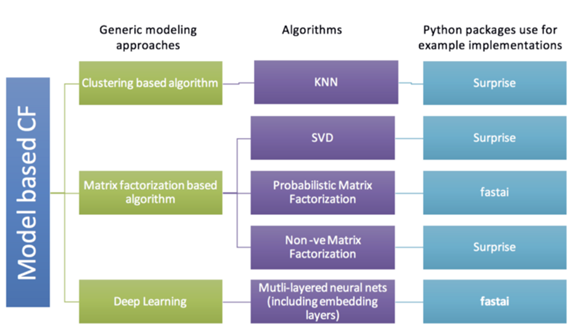


### 1. **Clustering based algorithm** - 

Clustering is essentially grouping the set of instances in a way that those within the same group (cluster) are like each other than to those in the other clusters. A cluster therefore is defined as a collection of samples which are similar between them and are dissimilar to the samples belonging to other clusters.

Clustering is a process to group a set of objects in such a way that objects in the same clusters are more like each other than to those in other clusters.

K-Mean Clustering - 

To obtain the best optimized performance, K-Means Clustering is implemented along with K-Nearest Neighbor on the movielens dataset. The data is distributed in the current technique, resulting in many clusters, while data is collected in the proposed technique and results in a low number of clusters. In the proposed scheme, the method of recommending a film is streamlined. The suggested recommendation framework predicts the user's preference for a film based on various criteria. The recommendation method operates on the notion that individuals have a shared desire or option. Such users can affect each other's views. This approach optimizes the mechanism and has lower RMSE values.

Below is the implementation of Movie Recommendation System using clustering approach where we made an attempt to cluster movies into 2 genres based on ratings from users.*italicized text*

#### Reading and preparing data

In [62]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [63]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\programdata\anaconda3\lib\site-packages (1.1.4)


In [64]:
#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns


In [65]:
#Loading movies data and ratings data
#movies_data=pd.read_csv('gdrive/My Drive/Recommendation system project/small_dataset/movies.csv')
#rating_data = pd.read_csv("gdrive/My Drive/Recommendation system project/small_dataset/ratings.csv")
movies_data=pd.read_csv('ml-latest-small/movies.csv')
rating_data=pd.read_csv('ml-latest-small/ratings.csv')

In [8]:
#Checking top rows of both the dataset
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
#Getting shape of both the dataset and getting unique values

print("Total number of movies =", movies_data.shape[0])
print("Total number of unique movies =", len(movies_data.movieId.unique()))
print("")
print("Total number of user ratings =", rating_data.shape[0])
print("Total number of unique users =", len(rating_data.userId.unique()))

Total number of movies = 9742
Total number of unique movies = 9742

Total number of user ratings = 100836
Total number of unique users = 610


In [11]:
#checking data for null values
movies_data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
rating_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

No null values observed.

In [13]:
# Keep only required columns
movie_data_kmean = movies_data.drop(['genres'], axis=1)
rating_data_kmean = rating_data.drop(['timestamp'], axis=1)

Selecting a few of the most famous films from two different genres.
We considered films in the "Action" and "Romance" genres here.
The goal is to find out if the collaborative filtering algorithm can learn the characteristics of these films effectively based on user ratings, so that we can clearly discern their genres and recommend them accordingly.

In [14]:
# Pick top movies
top_action_movies = ['Dark Knight, The', 'Lord of the Rings: The Return of the King', 
                     'Inception', 'Star Wars: Episode V - The Empire Strikes Back',
                     'Matrix, The']
top_romantic_movies = ['Notting Hill', 'Love Story \(1970\)', 'When Harry Met Sally',
                       'Titanic \(1997\)', 'Pretty Woman']
top_movies = top_action_movies + top_romantic_movies

movie_data = movie_data_kmean[movie_data_kmean.title.str.contains('|'.join(top_movies))]
movie_data

,movieId,title
514,597,Pretty Woman (1990)
898,1196,Star Wars: Episode V - The Empire Strikes Back...
1005,1307,When Harry Met Sally... (1989)
1291,1721,Titanic (1997)
1939,2571,"Matrix, The (1999)"
2007,2671,Notting Hill (1999)
3187,4296,Love Story (1970)
4800,7153,"Lord of the Rings: The Return of the King, The..."
6710,58559,"Dark Knight, The (2008)"
7372,79132,Inception (2010)


Merging movie and rating dataset based on movieId column

In [15]:
movie_rating_kmean = movie_data.merge(rating_data_kmean, on='movieId', how='inner')
movie_rating_kmean.head()

,movieId,title,userId,rating
0,597,Pretty Woman (1990),5,3.0
1,597,Pretty Woman (1990),6,4.0
2,597,Pretty Woman (1990),8,3.0
3,597,Pretty Woman (1990),10,3.5
4,597,Pretty Woman (1990),13,3.0


In [16]:
# Mean rating of a movie
movie_rating_kmean[movie_rating_kmean.title == 'Pretty Woman (1990)']['rating'].mean()

3.4851851851851854

In [17]:
# Top 10 movies by mean rating
movie_rating_kmean.groupby(['title'], sort=False)['rating'].mean().sort_values(ascending=False).head(10)

title
Dark Knight, The (2008)                                  4.238255
Star Wars: Episode V - The Empire Strikes Back (1980)    4.215640
Matrix, The (1999)                                       4.192446
Lord of the Rings: The Return of the King, The (2003)    4.118919
Inception (2010)                                         4.066434
When Harry Met Sally... (1989)                           3.858824
Pretty Woman (1990)                                      3.485185
Notting Hill (1999)                                      3.455357
Titanic (1997)                                           3.414286
Love Story (1970)                                        3.000000
Name: rating, dtype: float64

In [18]:
movie_rating_kmean

,movieId,title,userId,rating
0,597,Pretty Woman (1990),5,3.0
1,597,Pretty Woman (1990),6,4.0
2,597,Pretty Woman (1990),8,3.0
3,597,Pretty Woman (1990),10,3.5
4,597,Pretty Woman (1990),13,3.0
...,...,...,...,...
1379,79132,Inception (2010),596,4.0
1380,79132,Inception (2010),598,5.0
1381,79132,Inception (2010),599,3.0
1382,79132,Inception (2010),601,5.0


In [19]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
    genre_ratings.columns = column_names
    return genre_ratings

In [20]:
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(rating_data, movies_data, ['Romance', 'Action'], ['avg_romance_rating', 'avg_action_rating'])
genre_ratings.head()

,avg_romance_rating,avg_action_rating
1,4.31,4.32
2,4.50,3.95
3,0.50,3.57
4,3.38,3.32
5,3.09,3.11


In order to have a more delimited subset to study, we have biased our grouping to only get ratings from those users that like either romance or action movies.

In [21]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_action_rating'] > score_limit_2)) | ((genre_ratings['avg_action_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [22]:
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.5, 2.5)
biased_dataset=biased_dataset.rename(columns={'index':'userId'})

In [23]:
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  286


,userId,avg_romance_rating,avg_action_rating
0,3,0.50,3.57
1,4,3.38,3.32
2,5,3.09,3.11
3,7,2.65,3.26
4,8,3.50,3.33


We can see that 286 records are available, and there is a rating for a romance and action film for each one.

Now to get a clear overview of the biased dataset and its functionality, we will do some Visualization Analysis.

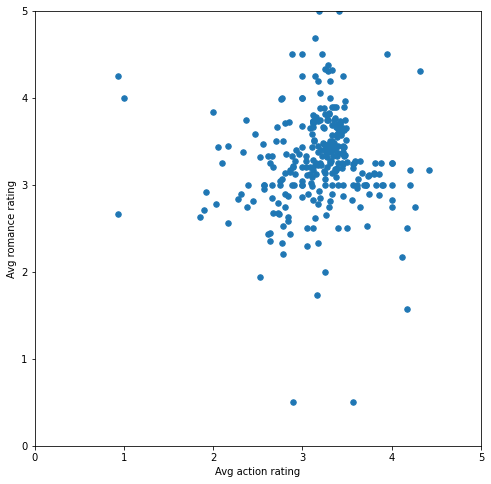

In [24]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_action_rating'],'Avg action rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')


The biase we have previously generated is now completely clear. By applying K-Means to break down the sample into two separate categories, we will take it to the next stage.

In [25]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_action_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

In [26]:
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

In [27]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg action rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_action_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20,cmap='viridis')
    return

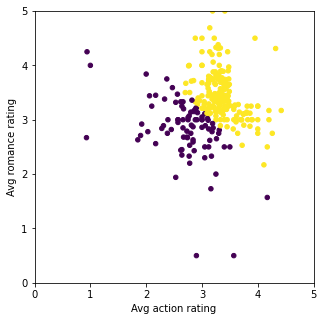

In [29]:
# Plot
draw_clusters(biased_dataset, predictions)


It is obvious that the grouping rationale is based on how romance movies are rated by each person. People who have a rating of 3 or higher in romance movies belong to one category, and people who have a rating of less than 3 belong to the other.

We will see now what happen if we divide the dataset into three groups.

In [30]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

In [31]:
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)


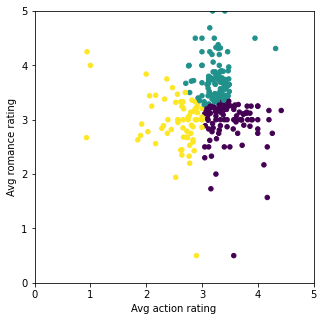

In [32]:
# Plot
draw_clusters(biased_dataset, predictions_2)

It is evident now that the science-fiction rating has started to come into play:

1. Users who like action and romance belong to the yellow group.

2. Users who like action but not romance belong to the green group.

3. Users who like romance but not action belong to the purple group.

we are going to take a bigger picture of the dataset and explore how users rate individual movies.

To do so, we will subset the dataset by ‘userid’ vs ‘user rating’ as follows.


In [33]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [34]:
# Define Function to get the most rated movies
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    return most_rated_movies_users_selection

In [35]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(rating_data, movies_data[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

In [36]:
# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Having a look at this subset of the dataset, it is evident that there are a lot of ‘NaN’ values as most of the users have not rated most of the movies. This type of datasets with a number that high of ‘null’ values are called ‘sparse’ or ‘low-dense’ datasets.

In order to deal with this issue, we will sort the datsaset by the most rated movies and the users that have rated the most number of movies. So we will obtain a much more ‘dense’ region at the top of the dataset.

In [37]:
# Define the sorting by rating function
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [38]:
# Sorting the movies and selecting 
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, (user_movie_ratings.shape[0])-1, (user_movie_ratings.shape[1]))

In [39]:
# Print the result
print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (610, 609)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Big Hero 6 (2014),Striptease (1996),Hellboy (2004),Road Trip (2000),Gremlins (1984),Into the Wild (2007),Star Wars: Episode VII - The Force Awakens (2015),8 Mile (2002),In Bruges (2008),"Knight's Tale, A (2001)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,3.5,2.0,3.5,4.0,4.0,3.5,3.5,4.0,4.5,3.0
598,3.5,4.0,5.0,3.0,5.0,5.0,4.0,3.5,4.5,NaN,...,2.0,2.5,3.5,2.5,3.0,NaN,3.5,2.5,NaN,3.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,NaN,3.0,3.5,3.5,2.0,2.5,4.5,4.0,4.0,4.0
273,4.5,4.5,5.0,4.0,4.0,3.0,3.5,4.5,4.5,4.0,...,NaN,NaN,3.0,3.5,4.5,3.5,NaN,3.5,NaN,2.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,3.5,NaN,3.0


In [40]:
#choose the first 1000 movies
most_rated_movies_1k = get_most_rated_movies(most_rated_movies_users_selection, 1000)

In [41]:
#shape of new dataframe
most_rated_movies_1k.shape

(610, 609)

In [42]:
most_rated_movies_1k.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,8 Mile (2002),Star Wars: Episode VII - The Force Awakens (2015),Into the Wild (2007),So I Married an Axe Murderer (1993),Road Trip (2000),Hellboy (2004),Striptease (1996),Big Hero 6 (2014),Heathers (1989),"Knight's Tale, A (2001)"
0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,4.0,3.5,3.5,4.0,4.0,3.5,2.0,3.5,5.0,3.0
1,3.5,4.0,5.0,3.0,5.0,5.0,4.0,3.5,4.5,NaN,...,2.5,3.5,NaN,2.5,2.5,3.5,2.5,2.0,NaN,3.0
2,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,4.0,4.5,2.5,NaN,3.5,3.5,3.0,NaN,NaN,4.0
3,4.5,4.5,5.0,4.0,4.0,3.0,3.5,4.5,4.5,4.0,...,3.5,NaN,3.5,2.5,3.5,3.0,NaN,NaN,NaN,2.5
4,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,3.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,4.0,3.0


In [43]:
#Checking for the null values
most_rated_movies_1k.isnull().sum()

title
Forrest Gump (1994)                 281
Shawshank Redemption, The (1994)    293
Pulp Fiction (1994)                 303
Silence of the Lambs, The (1991)    331
Matrix, The (1999)                  332
                                   ... 
Hellboy (2004)                      569
Striptease (1996)                   569
Big Hero 6 (2014)                   569
Heathers (1989)                     569
Knight's Tale, A (2001)             569
Length: 609, dtype: int64

Furthermore, since the k-means algorithm does not handle sparse datasets well, we will need to cast it as the SciPi library's sparse csr matrix form. To do so, we will first need to convert the dataset to a Sparse Dataframe, and to convert it to a sparse matrix using the to coo() method in pandas.

In [44]:
# Conversion to sparse csr matrix
sp_arr = csr_matrix(np.nan_to_num(most_rated_movies_1k))
sdf = pd.DataFrame.sparse.from_spmatrix(sp_arr)
sparse_ratings = sdf.sparse.to_coo()

In [45]:
sparse_ratings

<610x609 sparse matrix of type '<class 'numpy.float64'>'
	with 48461 stored elements in COOrdinate format>

#### Choosing the K-value

The success of the k-means clustering algorithm requires the option of a good value of k. The number of clusters can be between 1 and  the
total number of data points.

Overall number of data points (where each point is assigned to its own cluster).


So now for our dataset, we want to figure out the right number of clusters.Here, we will take an arbitrary number of clusters and spot those patterns and commonalities in each category. The number is going to be K = 25. We'll then plot each cluster as a heatmap after that.

In [46]:
#cluster 25
predictions = KMeans(n_clusters=25, algorithm='full').fit_predict(sparse_ratings)

In [47]:
# Select the  maximum number of users and movies
max_users = 100
max_movies = 100
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

#### Predictions

In [48]:
#Taking any random cluster from between 1-25. 
cluster_number = 4

In [49]:
# Let's filter to only see the region of the dataset with the most number of values 
n_users = 100
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

In [50]:
#sorting 
cluster = sort_by_rating_density(cluster, n_movies, n_users)

In [51]:
# Define the plotting heatmap function
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
      ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
      ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
      ax.invert_yaxis()
      ax.xaxis.tick_top()
      labels = most_rated_movies_users_selection.columns.str[:40]
      ax.set_xticklabels(labels, minor=False)
      ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
      plt.setp(ax.get_xticklabels(), rotation=90)
    else:
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax.grid(False)
      ax.set_ylabel('User id')
    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.show()
    return

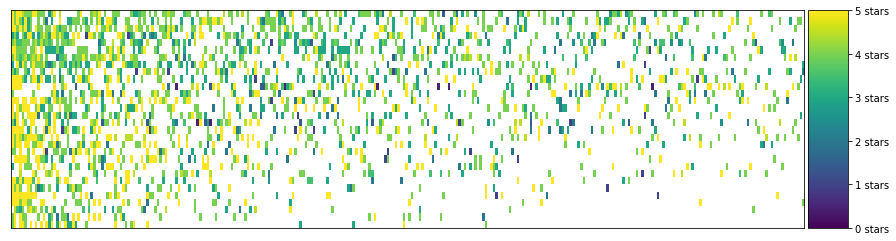

In [52]:
draw_movies_heatmap(cluster, axis_labels=False)

Based on that, we summed the ratings of all the other users in the cluster when one user did not have a rating for a certain movie, and that was our estimate of how this one user would like the movie. Using this logic, we will have an idea of how this 'taste cluster' feels for each movie in the dataset if we measured the average score for each movie in this cluster.

In [53]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Star Wars: Episode V - The Empire Strikes Back (1980)                             4.481481
Terminator 2: Judgment Day (1991)                                                 4.460000
Star Wars: Episode IV - A New Hope (1977)                                         4.562500
Aliens (1986)                                                                     4.458333
Jurassic Park (1993)                                                              4.340909
Star Wars: Episode VI - Return of the Jedi (1983)                                 4.363636
Matrix, The (1999)                                                                4.200000
Terminator, The (1984)                                                            4.500000
Back to the Future (1985)                                                         4.526316
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.578947
Alien (1979)                                                                      4.027778

For us, this is really useful because we can now use it as a recommendation engine that helps our users to discover movies that they are likely to enjoy.

For example, picking up one user id from above user ids(let say userID=7) , we will find the top 20 recommendation.


In [54]:
user_id=10

# Get all this user's ratings
user_ratings  = cluster.loc[user_id, :]

In [55]:
user_ratings

Star Wars: Episode V - The Empire Strikes Back (1980)                                             4.0
Terminator 2: Judgment Day (1991)                                                                 2.5
Star Wars: Episode IV - A New Hope (1977)                                                         5.0
Aliens (1986)                                                                                     NaN
Jurassic Park (1993)                                                                              5.0
                                                                                                 ... 
The Devil's Advocate (1997)                                                                       NaN
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    4.0
Donnie Darko (2001)                                                                               NaN
Interview with the Vampire: The Vampire Chronicles (1994)                         

In [56]:
# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_unrated_movies =  user_ratings[user_ratings.isnull()]

In [57]:
# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

In [58]:
# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

It's a Wonderful Life (1946)                                                      5.000000
Blazing Saddles (1974)                                                            4.750000
Exorcist, The (1973)                                                              4.750000
Rear Window (1954)                                                                4.750000
Unforgiven (1992)                                                                 4.750000
Chinatown (1974)                                                                  4.666667
Blade Runner (1982)                                                               4.583333
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.578947
Close Encounters of the Third Kind (1977)                                         4.571429
Schindler's List (1993)                                                           4.562500
Reservoir Dogs (1992)                                                             4.562500

And these are our top 20 recommendations to the user.

Advantages of K-means clustering -

The K-Means algorithm minimizes a criterion given as the sum of intracluster distance squares and then clusters the data by differentiating the samples into n equal variance groups. The number of clusters to be listed is required by this algorithm. Due to its ability to scale well to large datasets, K-means has been commonly used in various fields and throughout different applications.

### 2. **Matrix Factorization -**

Matrix factorization (MF) is a technique based on user-item interaction that calculates a latent factor model of a system. These user-item interactions can be represented as a matrix on one axis with users and on the other with items. Interactions in most movie recommendation systems are user ratings for movies, but there may also be different data, such as implicit feedback, temporal effects, and/or levels of confidence. In real world applications, this rating matrix is usually very sparse, as users usually only rate a fraction of all the movies in the system. MF has been shown to be able, even on very sparse matrices, to make very good predictions.

There are several different ways of factoring matrices, but for making recommendations, singular value decomposition is especially useful.

####Singular value decomposition (SVD) – 

Any matrix is decomposed by SVD into singular vectors and singular values. After mean centering, SVD is equal to PCA, i.e. shifting all data points so that their mean is on the origin.
Formally, SVD is decomposition of a matrix R into the product of three matrices:

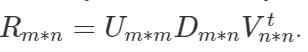

Where
Rm∗n, denotes the utility matrix with n equal to the number of e.g. users and m number exposed items (movies).

Um∗m, is a left singular orthogonal matrix, representing the relationship between users and latent factors.

Dm∗n, is a diagonal matrix (with positive real values) describing the strength of each latent factor. 

Vtn∗n (transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.

The general goal of SVD (and other matrix factorization methods) is to decompose the matrix R with all missing rijrij and multiply its components Um∗mDm∗nVtn∗n once again.

As a result, there are no missing values rijrij and it is possible to recommend each user movies (items) they have not seen or purchased yet.


#### Loading the dataset

In [66]:
#Loading movies data and ratings data again
#movies_data=pd.read_csv('gdrive/My Drive/Recommendation system project/small_dataset/movies.csv')
#rating_data = pd.read_csv("gdrive/My Drive/Recommendation system project/small_dataset/ratings.csv")
movies_data=pd.read_csv('ml-latest-small/movies.csv')
rating_data=pd.read_csv('ml-latest-small/ratings.csv')

Checking the dataset

In [67]:
#ratings
print(rating_data.head())

print(rating_data.info())

print(rating_data.describe())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000 

In [68]:
#movies
print(movies_data.head())

print(movies_data.info())

print(movies_data.describe())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
             movieId
count    9742.000000
mean    42200.3

#### Data preprocessing

Filtering the dataset

Firstly, to eliminate some of the noise from outliers, it is important to filter out movies and users with low exposure. All selected users have scored at least 20 movies in the data collection, according to the official MovieLens documentation. The following code, however, filters out the films and users based on an arbitrary threshold and produces a new rating_flrd_df dataframe. In addition, with new and old dimensions, the chunk also prints the importance of deleted movies.

In [69]:
#least movie rating
min_movie_ratings = 3

#least user rating
min_user_ratings =  5 

In [70]:
ratings_flrd_df = rating_data.groupby("movieId").filter(lambda x: x['movieId'].count() >= min_movie_ratings)
ratings_flrd_df = ratings_flrd_df.groupby("userId").filter(lambda x: x['userId'].count() >= min_user_ratings)


In [71]:
ratings_flrd_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [72]:
print("{0} movies deleted; all movies are now rated at least: {1} times. Old dimensions: {2}; New dimensions: {3}"\
.format(len(rating_data.movieId.value_counts()) - len(ratings_flrd_df.movieId.value_counts())\
        ,min_movie_ratings,rating_data.shape, ratings_flrd_df.shape ))

4744 movies deleted; all movies are now rated at least: 3 times. Old dimensions: (100836, 4); New dimensions: (94794, 4)


Now, we are loading the dataset using a particular method from Surprise module.

load from file() specifically loads a csv file. Surprise also allows the upload of DataFrame for pandas. This time, with Dataset.load from ratings_flrd_df, it is necessary to upload the data frame with user ratings per movie (i.e. in tidy format) and specify the reader as the argument.

The method build_full_trainset() builds the training set from the whole data set. Training on the entire data while using the best hyper tuning parameters is useful for the prediction of the highest arbitrary number of movies for each user ID, as shown later.

In [73]:
!pip install surprise

In [74]:
#Loading additional libraries

from collections import defaultdict #data colector

import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

##CrossValidation
from surprise.model_selection import cross_validate


##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF


In [75]:
#setting reader
reader = Reader(rating_scale=(0.5, 5))

In [76]:
#Loading dataset
data_svd = Dataset.load_from_df(ratings_flrd_df[["userId",	"movieId",	"rating"]], reader=reader)

In [77]:
# creating training and test data set
train_data = data_svd.build_full_trainset()
test_data = train_data.build_anti_testset()

####Number of Factors and RMSE
For the demonstrative reason, let's analyze the impact on the output of the model of the number of latent variables k. Specifically, the effect of many variables on the calculation of errors may be visually observed. Cross validate calculates the error rate for each fold, as in supervised machine learning. The following function calculates the RMSE average of the five folds given and appends the rmse svd empty list. Consequently, the list includes 100 min RMSE measurements, given 100 consecutive k values in each test set, and five folds in each iteration.

In [78]:
def rmse_vs_factors(algorithm, data):
  rmse_algorithm = []
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  return rmse_algorithm

In [79]:
rmse_svd = rmse_vs_factors(SVD,data_svd)

The following chunk describes the plot rmse() function with two arguments to reproduce the output plot for each subsequent model, where rmse is a list of float values and an instantiated matrix factorization model is an algorithm. The function returns a plot with subplots of two lines that show the performance vs. the number of factors. The second subplot only zooms in and marks k with the best, i.e. minimum RMSE, results.

In [80]:
def plot_rmse(rmse, algorithm):
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

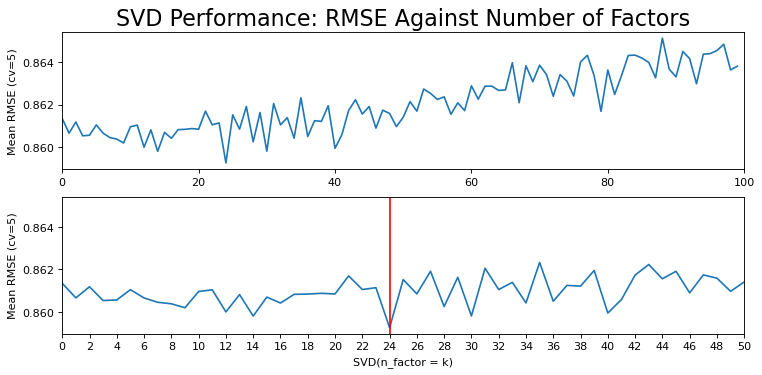

In [81]:
plot_rmse(rmse_svd,"SVD")

There is a growing pattern of worse output with higher k as per the figure. When k= 28, the lowest RMSE is achieved .The outcome, on the other hand indicates a set of values that can be used for parameter tuning in GridSearchCV().

GridsearchCV -

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [82]:
param_grid = {'n_factors': list(range(0,50))}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data_svd)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.860150728254599
{'n_factors': 24}


The grid algorithm considers n factors = 17 optimal to make the model generalizable, i.e. to prevent over and underfitting.

#### Training SVD Algorithm 

On train_data, SVD(n factors= 17) suits the model. In order to predict values i.e. scores, for each empty element aij in the utility matrix, it is important to define users and particular movies that are not in training set.

The aim is achieved by the build_anti_testset() trainset process. This returns a list of scores (testsets) which are not included in the trainset or in the R utility matrix as a whole. Consequently, the fitted model can be used and scores for films in the test range can be predicted.

In [83]:
algorithm_SVD = SVD(n_factors = 17)
algorithm_SVD.fit(train_data)

In [84]:
# Predict ratings for all pairs (i,j) that are NOT in the training set.
test_data = train_data.build_anti_testset()

#### Carrying predictions and recommendations

In [85]:
#predictions
predictions = algorithm_SVD.test(test_data)

In [86]:
# subset of the list  predictions
predictions[0:3]

[Prediction(uid=1, iid=318, r_ui=3.5197164377492247, est=5, details={'was_impossible': False}),
 Prediction(uid=1, iid=1704, r_ui=3.5197164377492247, est=4.708892253162997, details={'was_impossible': False}),
 Prediction(uid=1, iid=6874, r_ui=3.5197164377492247, est=4.954159543800676, details={'was_impossible': False})]

There are raw predictions contained in a list. Searching for any user ID and forecasts with meaningful data will also be difficult.


The get_top_n() function below accomplishes the objectives. Five arguments are necessary for the function. In particular, predictions are the list of predictions (predictions= algo SVD.test(test_data)), userId is the id of an arbitrary user, movie_data is DataFrame for each movieId with title and genre, ratings df includes historical ratings, and n determines how many movies the user should be recommended. By default, the setting of n is 10.

In [87]:
def get_top_n(predictions, userId, movie_data, rating_data, n = 10):
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = rating_data[rating_data.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movie_data, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = rating_data[rating_data.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movie_data, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

Since the model has been properly trained, any userID n movies can already be suggested at this stage. In addition, it is fair to visually inspect the recommended movies and the user's highest rated movies in the past based on the acquired predictions and established get_top_n() function. Let's say for example, that user Id 112 wants to watch a movie at its earliest convenience, but does not have a particular title in mind. In addition, the film database includes over 6,000 titles spanning various genres, meaning that the user spends a lot of time exploring what films are in line with their unique tastes. The following code makes the choice much simpler for the user. It is instantly evident that user 112 has already rated 50 movies after calling the get_top_n() function.

In [88]:
hist_SVD_112, pred_SVD_112 = get_top_n(predictions, movie_data = movies_data, userId = 112, rating_data = rating_data)


User 112 has already rated 65 movies.


Checking user taste by historical rating data

In [89]:
hist_SVD_112[['userId','genres']].head(10)

,userId,genres
0,112,Action|Adventure|Sci-Fi
1,112,Action|Adventure
2,112,Adventure|Fantasy
3,112,Action|Sci-Fi|Thriller
4,112,Action|Adventure|Sci-Fi
5,112,Action|Romance|Sci-Fi|Thriller
6,112,Action|Adventure|Drama|Fantasy
7,112,Action|Crime|Drama|IMAX
8,112,Action|Adventure|Sci-Fi|Thriller
9,112,Action|Adventure|Sci-Fi|Thriller


Based on the history of ratings of UserID 112, our recommendation system will predict top 10 movies to user.

In [90]:
pred_SVD_112[['userId','genres']]

,userId,genres
0,112,Comedy|War
1,112,Adventure|Comedy|Fantasy
2,112,Comedy|Drama|Romance|War
3,112,Drama
4,112,Adventure|Drama|War
5,112,Crime|Drama
6,112,Drama
7,112,Crime|Drama
8,112,Crime|Horror
9,112,Drama


We can observe the genres of the movies predicted by the recommendation system are in line with the user's taste.

Now we will try another approach Non-Negative Matrix Factorization (NMF) to find movie recommendations.

#### Non-Negative Matrix Factorization (NMF) -

Another technique used for matrix factorization is NMF. Contrary to SVD, the non-negative utility matrix R is decomposed by NMF into the product of matrices W and H-

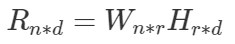

Where columns in matrix ,


Wn∗r, represent components.

Hr∗d, stores the corresponding weights.

NMF introduces constraints under which: W ≥ 0 and H ≥ 0. 

The component-wise nonnegativity is a substantial difference from SVD.

Using the same dataset as used for SVD and carrying out the mean RMSE error with respect to number of factors using rmse_vs_factors function.

In [91]:
data_nmf=data_svd
rmse_nmf = rmse_vs_factors(NMF, data_nmf)

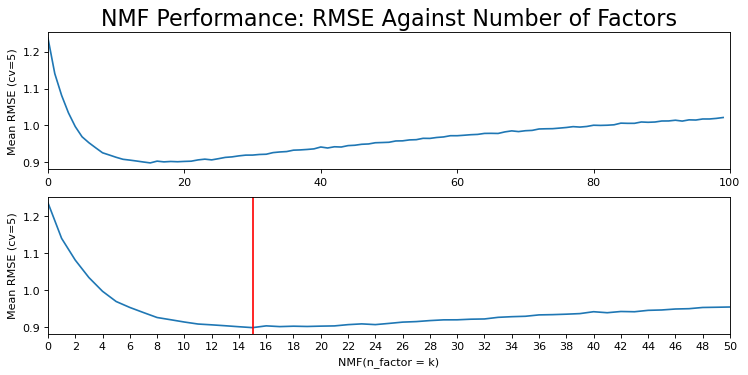

In [92]:
#Plotting RMSE vs factors
plot_rmse(rmse_nmf, "NMF")

From the above plot, it is clear that lowest k value has been achieved when n_factors = 15. We can use the above plot to determine the range to provide the GridSearchCV() to get the best parameter for our NMF model.

In [93]:
#Using GridSearchCV to get the best factor number to fit the NMF algorithmn
param_grid = {'n_factors': list(range(6,20))}
gs = GridSearchCV(NMF, param_grid, measures=['rmse'], cv=5)
gs.fit(data_nmf)

In [94]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8970780695319747
{'n_factors': 18}


The grid algorithm considers n factors = 18 optimal to make the model generalizable, i.e. to prevent over and underfitting.

#### Training the NMF algorithm

In [95]:
#Fitting NMF algorithm
algorithm_NMF = NMF(n_factors = 18)
algorithm_NMF.fit(train_data)

In [96]:
# Predict ratings for all pairs (u, i) that are NOT in the training set.
test_data = train_data.build_anti_testset()

#Predictions
predictions = algorithm_NMF.test(test_data)

Checking the historical and predicted movie of the userID 112 to compare with SVD

In [97]:
hist_NMF_112, pred_NMF_112 = get_top_n(predictions, movie_data = movies_data, userId = 112, rating_data = rating_data)

User 112 has already rated 65 movies.


#### Checking NMF algorithm recommended movies

In [98]:
pred_NMF_112


,userId,movieId,rat_pred,title,genres
0,112,4967,5.0,No Man's Land (2001),Drama|War
1,112,1232,5.0,Stalker (1979),Drama|Mystery|Sci-Fi
2,112,55363,5.0,Assassination of Jesse James by the Coward Rob...,Crime|Drama|Western
3,112,2732,5.0,Jules and Jim (Jules et Jim) (1961),Drama|Romance
4,112,7748,5.0,Pierrot le fou (1965),Crime|Drama
5,112,170705,5.0,Band of Brothers (2001),Action|Drama|War
6,112,951,5.0,His Girl Friday (1940),Comedy|Romance
7,112,918,5.0,Meet Me in St. Louis (1944),Musical
8,112,2239,5.0,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
9,112,2511,5.0,"Long Goodbye, The (1973)",Crime|Film-Noir


Among them, SVD achieved slightly lower RMSE (0.864), and therefore performed better, compared to measured RMSE (0.886) by NMF. Both models were hyper parametrized for several latent factors used in training of the algorithms. 

### 3. **Deep Learning -**

The recommendation framework is a subset of the Information Filtering System that can be used for recommendations in a number of fields, such as movies, music, e-commerce, and feed streams. Through observing and mining user habits, the recommendation system discovers the personalized needs and desires of the user, and recommends knowledge or items that may be of interest to the user. In contrast to search engines, the recommendation framework does not need users to define their criteria precisely, but to model their historical actions in order to provide knowledge that fits user interests and needs proactively.

https://dzone.com/articles/building-a-deep-learning-based-movie-recommender-s

They also resorted to matrix factorization and applied an internal product to the latent features of users and objects when it comes to modeling the main factor in collaborative filtering—the interaction between user and item characteristics.
We present a general framework called NCF, short for Neural network-based Collaborative Filtering, by replacing the inner product with a neural architecture that can learn an arbitrary function from data. NCF is generic and can, under its structure, express and generalize matrix factorization. We suggest using a multi-layer perceptron to learn the user-item interaction feature in order to supercharge NCF modeling with non-linearities. Extensive studies on two real-world datasets demonstrate major advances over state-of-the-art approaches in our proposed NCF system. Empirical evidence demonstrates that better recommendation efficiency is offered by utilizing deeper layers of neural networks.

https://dl.acm.org/doi/abs/10.1145/3038912.3052569



In [100]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=5f67483c5a799e4a3a36c5324bfb89ac4b35da338d8fb5e8a63494129bd4a5a6
  Stored in directory: c:\users\madhurikasitut\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [102]:
!pip install keras


In [132]:
#Additional libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2


We will be making use of ratings dataset of Movie Lens data

In [133]:
#loading rating dataset
#rating_data_NN = pd.read_csv("gdrive/My Drive/Recommendation system project/small_dataset/ratings.csv")
rating_data_NN=pd.read_csv('ml-latest-small/ratings.csv')

In [134]:
#getting clearer look into the data
rating_data_NN.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Preprocessing operations to encode movies and users as integer indices

In [135]:
user_ids = rating_data_NN["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = rating_data_NN["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
rating_data_NN["user"] = rating_data_NN["userId"].map(user2user_encoded)
rating_data_NN["movie"] = rating_data_NN["movieId"].map(movie2movie_encoded)

In [136]:
#checking data
rating_data_NN.head()

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4


In [137]:
#Carrying out the number of users and movies
num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

In [138]:
rating_data_NN["rating"] = rating_data_NN["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(rating_data_NN["rating"])
max_rating = max(rating_data_NN["rating"])

In [139]:
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


#### Preparing training and validation data

In [140]:
rating_data_NN = rating_data_NN.sample(frac=1, random_state=42)
x = rating_data_NN[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = rating_data_NN["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * rating_data_NN.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

The number of factors per user/movie(EMBEDDING_SIZE) is another constant that we'll need for the model. This number may be anything we want, but for the collaborative filtering model, all users and movies need to be the same size. We are taking 50 as the value of EMBEDDING_SIZE.

In [141]:
EMBEDDING_SIZE = 50

Creating the Neural Net for our dataset. For that, we're going to use embeddings to represent each user and each movie in the data. These embeddings will be vectors (n-factors of size) that begin as random numbers, but are suitable for the model to capture each user/movie's qualities. By computing the dot product between a user vector and a movie vector to get a predicted rating, we can achieve this. The code is fairly straightforward, with no conventional neural network layer or activation involved.

In [142]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


In [143]:
#Summary of the model
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)


In [144]:
#compliling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001))

#### Training the model

In [145]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1418/1418 [==============================] - 4s 3ms/step - loss: 0.6368 - val_loss: 0.6204
Epoch 2/5
1418/1418 [==============================] - 4s 3ms/step - loss: 0.6132 - val_loss: 0.6186
Epoch 3/5
1418/1418 [==============================] - 4s 3ms/step - loss: 0.6083 - val_loss: 0.6130
Epoch 4/5
1418/1418 [==============================] - 4s 3ms/step - loss: 0.6073 - val_loss: 0.6123
Epoch 5/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.6063 - val_loss: 0.6128


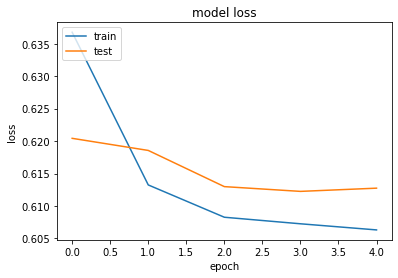

In [146]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

We can see the training loss and validation loss is decreasing with the number of epochs

#### Show top 10 movie recommendations to a user

In [147]:
movie_df = movies_data=pd.read_csv('ml-latest-small/movies.csv')


# Let us get a user and see the top recommendations.
user_id = rating_data_NN.userId.sample(1).iloc[0]
movies_watched_by_user = rating_data_NN[rating_data_NN.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user: 274
Movies with high ratings from user
--------------------------------
Pulp Fiction (1994) : Comedy|Crime|Drama|Thriller
American Beauty (1999) : Drama|Romance
Fight Club (1999) : Action|Crime|Drama|Thriller
Eternal Sunshine of the Spotless Mind (2004) : Drama|Romance|Sci-Fi
Inglourious Basterds (2009) : Action|Drama|War
--------------------------------
Top 10 movie recommendations
--------------------------------
Lawrence of Arabia (1962) : Adventure|Drama|War
Amadeus (1984) : Drama
Boot, Das (Boat, The) (1981) : Action|Drama|War
Glory (1989) : Drama|War
Miller's Crossing (1990) : Crime|Drama|Film-Noir|Thriller
Graduate, The (1967) : Comedy|Drama|Romance
Touch of Evil (1958) : Crime|Film-Noir|Thriller
Femme Nikita, La (Nikita) (1990) : Action|Crime|Romance|Thriller
Bridge on the River Kwai, The (1957) : Adventure|Drama|War
Chinatown (1974) : Crime|Film-Noir|Mystery|Thriller


We still managed to get a result that is pretty similar to the best results we have seen with the conventional approach without doing any tuning at all. This approach has the added advantage that we can easily integrate new functionality into the model. For example, as a new embedding layer, we might build some date characteristics from the timestamp or throw in the movie genres.

### References

1. https://builtin.com/data-science/collaborative-filtering-recommender-system
2. https://www.researchgate.net/publication/334763301_Movie_Recommender_System_Using_K-Means_Clustering_AND_K-Nearest_Neighbor
3. https://www.researchgate.net/publication/328741211_Comparative_Analysis_of_Clustering_Techniques_for_Movie_Recommendation
4. https://www.diva-portal.org/smash/get/diva2:927190/FULLTEXT01.pdf
5. https://stackoverflow.com/questions/62434179/is-there-any-way-to-solve-this-error-in-python	
6. https://towardsdatascience.com/unsupervised-classification-project-building-a-movie-recommender-with-clustering-analysis-and-4bab0738efe6
7. https://datascience.stackexchange.com/questions/68194/random-forest-valueerror-input-contains-nan-infinity-or-a-value-too-large-fo
8. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
9. https://keras.io/examples/structured_data/collaborative_filtering_movielens/

